## 1.3 An example of logistic regression with Python using the machine learning module 'sklearn'
For this example we start simple, creating sample data with two predictor variables (features), before we continue to a real life example in 1.4

In [13]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


### creating sample data
Two classes (ie, two outcomes, eg, healthy and diseased)
200 samples
Each sample is described by 2 predictor variables (features), eg, age and BMI

In [14]:

# generate a 2D classification dataset
X, y = make_classification(n_samples=200, n_classes=2, n_features=2, 
                           n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

#add some noise to the data
rng = np.random.RandomState(2) # random seed
X += 2 * rng.uniform(size=X.shape) # add the noise to the predictors

### Visualizing the data points of the two classes (in red and blue)

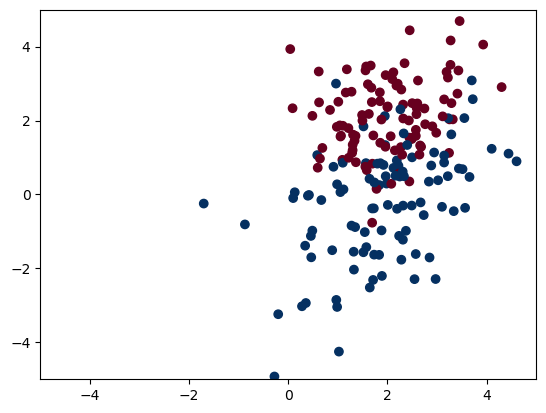

In [15]:
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
plt.scatter(X[:,0],X[:,1],c=y,cmap="RdBu")
plt.xlim((-5,5))
plt.ylim((-5,5))
plt.show()

## Using sklearn to perform logistic regression

details on https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [16]:
from sklearn.linear_model import LogisticRegression

Hyperparameters to set:
- Regularization penalty mode (default is 'l2')
- Regularization parameter C (number, inverse of regularization strength; default = 1)

Note, a high C (eg. 10000) = low regularization (ie, assuming the training data is very representative).

We start with the default values 

In [17]:
#set the hyperparameters
_penalty = 'l2'
_C = 1
#fit the model
clf = LogisticRegression(penalty=_penalty, C=_C).fit(X, y)

#### Visualising the result, the hyper-plane (ie, the decision boundary) 
In case of linear logistic regression, this is a straight line in 2-dimensional space.

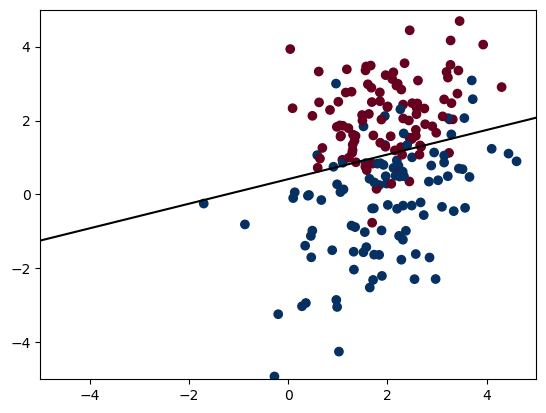

In [18]:

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
plt.xlim((-5,5))
plt.ylim((-5,5))
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.scatter(X[:,0],X[:,1],c=y,cmap="RdBu")
plt.plot(xx, yy, 'k-')
plt.show()

In [19]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X)

print('logistic regression classifier accuracy:',accuracy_score(y, y_pred))

logistic regression classifier accuracy: 0.865
